# Deployment

In [59]:
import pandas as pd
from pipeline import Pipeline
from recommendation import RecommendationSystem
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
steam = pd.read_csv(
    r"D:\Repo\DS\RecommenderSystem\Content-Based-SteamGame\metadata.csv")

In [61]:
steam.head()

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,movies,total_ratings
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,10000000-20000000,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN,121195
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,5000000-10000000,3.99,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,https://steamcdn-a.akamaihd.net/steam/apps/20/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/20/...,NaN,2685
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN,3018
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,5000000-10000000,3.99,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,https://steamcdn-a.akamaihd.net/steam/apps/40/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/40/...,NaN,1006
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,5000000-10000000,3.99,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN,4962


In [62]:
pipeline = Pipeline(df=steam)

In [63]:
similarity_matrix = pipeline.preprocessing()

In [64]:
similarity_matrix.shape


(13832, 13832)

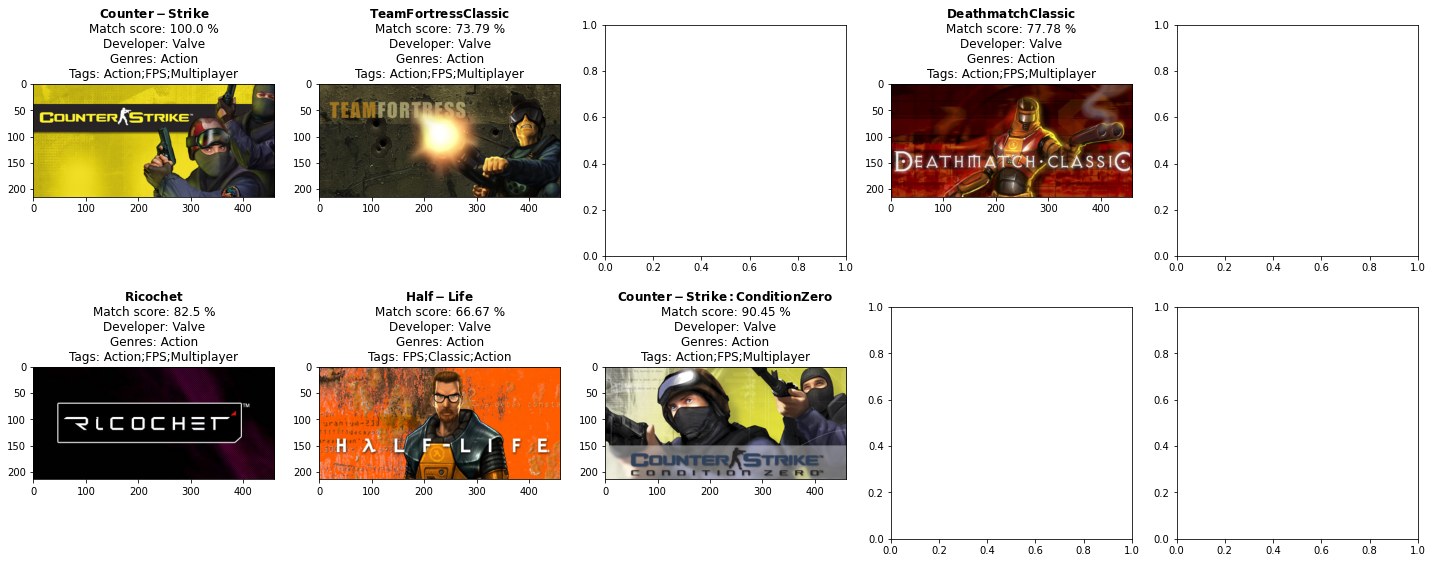

Average Match Score: 79.6870


(                                name developer  genres  \
 0                     Counter-Strike     Valve  Action   
 10            Counter-Strike: Source     Valve  Action   
 7     Counter-Strike: Condition Zero     Valve  Action   
 5                           Ricochet     Valve  Action   
 3                 Deathmatch Classic     Valve  Action   
 1              Team Fortress Classic     Valve  Action   
 13           Half-Life 2: Deathmatch     Valve  Action   
 15      Half-Life Deathmatch: Source     Valve  Action   
 6                          Half-Life     Valve  Action   
 1350                ShootMania Storm     Nadeo  Action   
 
                steamspy_tags  match_score  
 0     Action;FPS;Multiplayer       100.00  
 10    Action;FPS;Multiplayer        94.87  
 7     Action;FPS;Multiplayer        90.45  
 5     Action;FPS;Multiplayer        82.50  
 3     Action;FPS;Multiplayer        77.78  
 1     Action;FPS;Multiplayer        73.79  
 13    Action;FPS;Multiplayer     

<Figure size 432x288 with 0 Axes>

In [68]:
rec_system = RecommendationSystem(df=steam,similarity_vectorizer=similarity_matrix)
rec_system.recommendations(name="Counter-Strike")

In [69]:
import gradio as gr
from gradio import Interface, Textbox, Dataframe, Image

# Create the input and output components
inputs = Textbox(label='Steam game')
outputs = [Dataframe(type='pandas', label='SIMILAR-GAME'),
           Image(label="Plot", type='pil')]
examples = steam['name'].tolist()

title = 'Game Recommendation System'
description = (
    "<center>"
    "Enter the name of the Steam game you want to get recommendations for. "
    "The system will provide a list of similar games along with their details and images."
    "</center>"
)

# Create the Gradio interface
demo = Interface(fn=rec_system.recommendations, 
                 inputs=inputs, 
                 outputs=outputs,
                 title=title,
                 description=description,
                 examples=examples)
demo.launch(share=True)


Running on local URL:  http://127.0.0.1:7876
Running on public URL: https://fbe7665c3b44a8beb9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


d:\Repo\DS\RecommenderSystem\Content-Based-SteamGame\recommendation.py:70: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  average_match_score = df['match_score'].mean()


Average Match Score: 75.3660


d:\Repo\DS\RecommenderSystem\Content-Based-SteamGame\recommendation.py:70: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  average_match_score = df['match_score'].mean()


Average Match Score: 87.4280


d:\Repo\DS\RecommenderSystem\Content-Based-SteamGame\recommendation.py:70: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  average_match_score = df['match_score'].mean()


Average Match Score: 79.6870
